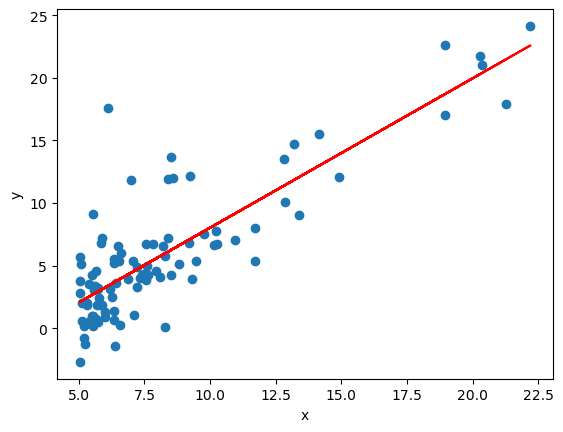

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data from file
data = np.loadtxt('data2.txt', delimiter=',')

# Extract x and y values
x = data[:, 0]
y = data[:, 1]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Add a column of ones to x_train and x_test for the intercept term
x_train = np.c_[np.ones((len(x_train), 1)), x_train.reshape(-1, 1)]
x_test = np.c_[np.ones((len(x_test), 1)), x_test.reshape(-1, 1)]

# 1. Normal equation method
# Compute the coefficients using the normal equation
w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

# Print the coefficients
print('Normal equation method')
print('w0 =', w[0])
print('w1 =', w[1])

# 2. Batch Gradient Descent method
# Initialize the learning rate, number of iterations, and initial values of w0 and w1
alpha = 0.1
iterations = 1000
w = np.zeros(2)

# Define the cost function
def cost_function(x, y, w):
    m = len(y)
    J = 1/(2*m) * np.sum((x.dot(w) - y)**2)
    return J

# Initialize lists to store MSE and iteration for batch gradient descent
mse_train_bgd = []
mse_test_bgd = []
iteration_bgd = []

# Perform Batch Gradient Descent
for i in range(iterations):
    gradients = 1/len(y_train) * x_train.T.dot(x_train.dot(w) - y_train)
    w = w - alpha * gradients
    mse_train_bgd.append(cost_function(x_train, y_train, w))
    mse_test_bgd.append(cost_function(x_test, y_test, w))
    iteration_bgd.append(i)

    # Check for termination condition
    if mse_test_bgd[-1] < 1.0:
        break

# Print the coefficients
print('Batch Gradient Descent method')
print('w0 =', w[0])
print('w1 =', w[1])

# 3. Stochastic Gradient Descent method
# Initialize the learning rate, number of iterations, and initial values of w0 and w1
alpha = 0.1
iterations = 1000
w = np.zeros(2)

# Initialize lists to store MSE and iteration for stochastic gradient descent
mse_train_sgd = []
mse_test_sgd = []
iteration_sgd = []

# Perform Stochastic Gradient Descent
for i in range(iterations):
    for j in range(len(y_train)):
        random_index = np.random.randint(len(y_train))
        xi = x_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(w) - yi)
        w = w - alpha * gradients

    mse_train_sgd.append(cost_function(x_train, y_train, w))
    mse_test_sgd.append(cost_function(x_test, y_test, w))
    iteration_sgd.append(i)

    # Check for termination condition
    if mse_test_sgd[-1] < 1.0:
       break

Normal equation method
w0 = -3.7772803447126604
w1 = 1.1699588897970419
Batch Gradient Descent method
w0 = nan
w1 = nan


/var/folders/6h/p8nwbyjj3sv4vz65r6gg_vdm0000gn/T/ipykernel_49701/298017196.py:37: RuntimeWarning: overflow encountered in square
  J = 1/(2*m) * np.sum((x.dot(w) - y)**2)
/Users/amangupta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/6h/p8nwbyjj3sv4vz65r6gg_vdm0000gn/T/ipykernel_49701/298017196.py:48: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradients
/var/folders/6h/p8nwbyjj3sv4vz65r6gg_vdm0000gn/T/ipykernel_49701/298017196.py:80: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradients
